In [1]:
# Import dependencies
from pprint import pprint
import pandas as pd 
import requests
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

import gmaps
import os
import json
import time
from config import g_key

In [2]:
merged_clean = pd.read_csv('data/yelp_inspection_merge.csv')
merged_clean.head()


,Unnamed: 0.1,AKA Name,Facility Type,Risk,Address,Zip,Year,Inspection Type,Results,Violations,...,display_address,address1,address2,address3,city,latitude,longitude,zip code,restaurant_id,price_integer
0,0,AREPA GEORGE,Restaurant,Risk 1 (High),1552 N KEDZIE AVE,60651.0,2021,Canvass,Pass,NaN,...,"['1552 N Kedzie Ave', 'Chicago, IL 60651']",1552 N Kedzie Ave,NaN,NaN,Chicago,41.909745,-87.707155,60651,3nOO3B9xoASM9XLzJfbHDg,2.0
1,1,AREPA GEORGE,Restaurant,Risk 1 (High),1552 N KEDZIE AVE,60651.0,2020,Canvass,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,...,"['1552 N Kedzie Ave', 'Chicago, IL 60651']",1552 N Kedzie Ave,NaN,NaN,Chicago,41.909745,-87.707155,60651,3nOO3B9xoASM9XLzJfbHDg,2.0
2,2,GRAND LUX CAFE,Restaurant,Risk 1 (High),111 E ONTARIO ST,60611.0,2021,Short Form Complaint,Pass,NaN,...,"['600 N Michigan Ave', 'Chicago, IL 60611']",600 N Michigan Ave,NaN,NaN,Chicago,41.892896,-87.624868,60611,HSvG0P-1Qt1G8avx7B3mCg,2.0
3,3,GRAND LUX CAFE,Restaurant,Risk 1 (High),111 E ONTARIO ST,60611.0,2021,Complaint,Fail,"48. WAREWASHING FACILITIES: INSTALLED, MAINTAI...",...,"['600 N Michigan Ave', 'Chicago, IL 60611']",600 N Michigan Ave,NaN,NaN,Chicago,41.892896,-87.624868,60611,HSvG0P-1Qt1G8avx7B3mCg,2.0
4,4,GRAND LUX CAFE,Restaurant,Risk 1 (High),111 E ONTARIO ST,60611.0,2021,Complaint Re-Inspection,Pass,NaN,...,"['600 N Michigan Ave', 'Chicago, IL 60611']",600 N Michigan Ave,NaN,NaN,Chicago,41.892896,-87.624868,60611,HSvG0P-1Qt1G8avx7B3mCg,2.0


In [3]:
pf = merged_clean["Year"].unique()
pf

array([2021, 2020, 2022])

# Failed

In [4]:
#DataFrame for Restaurant with Failed Status
failed_df = merged_clean.loc[merged_clean["Results"] == "Fail"]

In [5]:
fail = pd.DataFrame(failed_df, columns = ['name','review_count','category','category_title','Risk', 'price_integer',
                                                'rating', 'Year', 'zip code_y','address1','price','Inspection Type','Results','Violations','Latitude','Longitude'])
#fail.head(5)


In [6]:
#create link for gmaps
gmaps.configure(api_key = g_key)

In [7]:
# configure gmaps for lat/lng vs rating based on . Store latitude and longitude in locations
locations_f = fail[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = fail["rating"].astype(float)

In [8]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations_f, weights=rating, 
                                 dissipating=False, max_intensity=300,
                                 point_radius=50)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
#configure a map with all the points
figure = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure)

#Add markers
markers = gmaps.marker_layer(locations_f)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [10]:
f = failed_df["Year"].unique()
f

array([2021, 2020, 2022])

# Passing DataFrame

In [11]:
#DataFrame for Restaurant with Passed Status
passed_df = merged_clean.loc[merged_clean["Results"] == "Pass"]
pass_df = pd.DataFrame(passed_df, columns = ['name','review_count','category','category_title','Risk', 'price_integer',
                                                'rating', 'Year', 'zip code_y','address1','price','Inspection Type','Results','Violations','Latitude','Longitude'])
#pass_df.head(5)

Heat Map Rating with Lat/Lng: use Latitude, Longitude and Rating as weight

In [12]:
#configure gmaps for lat/lng vs rating

# Store latitude and longitude in locations
locations = pass_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = pass_df["rating"].astype(float)

In [13]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=100)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

Marker Map of Pass: use Latitude, Longitude

In [14]:
#configure a map with all the points
locations_p = pass_df[["Latitude", "Longitude"]]

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

#Add markers
markers = gmaps.marker_layer(locations_p)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

Price vs Year ScatterPlot

In [15]:
pass_df['rating'].replace('', np.nan, inplace=True)
pass_df.dropna(subset=['rating'], inplace=True)
p = pass_df["Year"].unique()
p

array([2021, 2020, 2022])

In [16]:

x_values = pass_df["Year"]
y_values = pass_df["rating"]


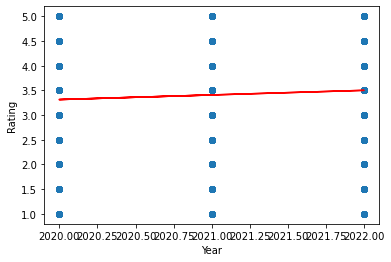

In [17]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

# Pass vs Fail in Bar Chart

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Passed = pass_df['name'].count()
Failed = failed_df['name'].count()
print(Passed)
print(Failed)

3453
1434


In [19]:
result = ["Pass", "Fail"] 
count = [441,184]
res_df = pd.DataFrame({"Result": result,"Count": count})
res_df


,Result,Count
0,Pass,441
1,Fail,184


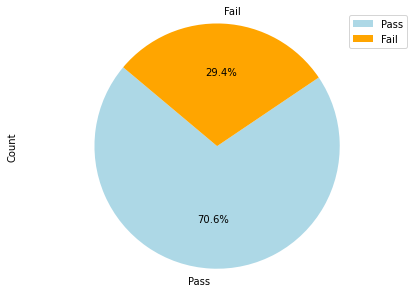

In [70]:

# Generate a pie plot showing the distribution of pass vs fail

colors = ["lightblue","orange"]

plot = res_df.plot.pie(y="Count", labels=("Pass","Fail"), figsize=(7,5), colors = colors, autopct="%1.1f%%",
                             startangle=140,)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig('images/pie_pass_fail.png')
plt.show()

In [21]:
pass_df

,name,review_count,category,category_title,Risk,price_integer,rating,Year,zip code_y,address1,price,Inspection Type,Results,Violations,Latitude,Longitude
0,ArePA George,144,colombian,Colombian,Risk 1 (High),2.0,4.5,2021,NaN,1552 N Kedzie Ave,$$,Canvass,Pass,NaN,41.909898,-87.707145
1,ArePA George,144,colombian,Colombian,Risk 1 (High),2.0,4.5,2020,NaN,1552 N Kedzie Ave,$$,Canvass,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.909898,-87.707145
2,Grand Lux Cafe,85,tradamerican,American (Traditional),Risk 1 (High),2.0,3.5,2021,NaN,600 N Michigan Ave,$$,Short Form Complaint,Pass,NaN,41.893216,-87.624812
4,Grand Lux Cafe,85,tradamerican,American (Traditional),Risk 1 (High),2.0,3.5,2021,NaN,600 N Michigan Ave,$$,Complaint Re-Inspection,Pass,NaN,41.893216,-87.624812
5,Grand Lux Cafe,85,tradamerican,American (Traditional),Risk 1 (High),2.0,3.5,2021,NaN,600 N Michigan Ave,$$,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.893216,-87.624812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,Macanudo Mate,10,latin,Latin American,Risk 1 (High),NaN,4.5,2020,NaN,108 N State St,NaN,Canvass,Pass,57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...,41.883423,-87.628022
4882,Subway,25,sandwiches,Sandwiches,Risk 1 (High),1.0,4.5,2020,NaN,1449 E 57th St,$,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.791405,-87.589778
4883,Burger King,62,hotdogs,Fast Food,Risk 2 (Medium),1.0,2.0,2020,NaN,1323 W Irving Park Rd,$,Canvass,Pass,54. GARBAGE & REFUSE PROPERLY DISPOSED; FACILI...,41.954258,-87.663216
4884,Subway,6,sandwiches,Sandwiches,Risk 1 (High),1.0,2.5,2020,NaN,7138 N Sheridan,$,Canvass,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,42.012710,-87.664034


# pie chart for passing vs rating

In [64]:
pass_df['bins'] = pd.cut(pass_df['rating'],bins=[0, 1.5, 3.5, 5], labels=['Poor', 'Okay', 'Great'])
P_df = pass_df.groupby(['rating', 'bins']).size().unstack(fill_value=0)
print(P_df)


bins    Poor  Okay  Great
rating                   
1.0       61     0      0
1.5      145     0      0
2.0        0   248      0
2.5        0   436      0
3.0        0   447      0
3.5        0   680      0
4.0        0     0    846
4.5        0     0    474
5.0        0     0    116


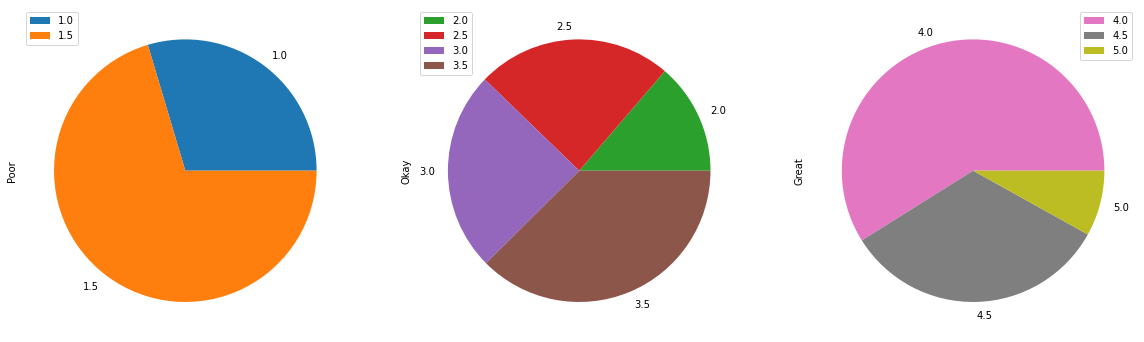

In [65]:
P_df.plot.pie(subplots=True,figsize=(20, 20))
plt.savefig('images/pie_passing_rating.png')

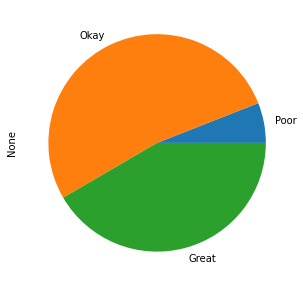

In [66]:
P = pass_df.groupby('bins').size()
P.plot.pie(figsize=(5,5))
plt.savefig('images/pie_all_passing_rating.png')

# Pie chart for failing vs rating

In [67]:
fail['Binned'] = pd.cut(fail['rating'], bins=[0, 1.5, 3.5, 5], labels=['Poor', 'Okay', 'Great'])
F_df = fail.groupby(['rating', 'Binned']).size().unstack(fill_value=0)
print (F_df)


Binned  Poor  Okay  Great
rating                   
1.0       24     0      0
1.5       40     0      0
2.0        0    78      0
2.5        0   137      0
3.0        0   180      0
3.5        0   297      0
4.0        0     0    397
4.5        0     0    216
5.0        0     0     65


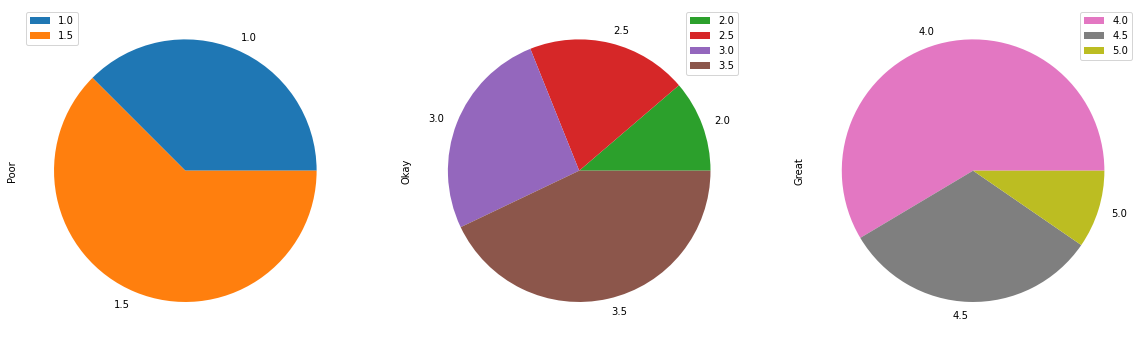

In [68]:
F_df.plot.pie(subplots=True,figsize=(20, 20))
plt.savefig('images/pie_failing_rating.png')

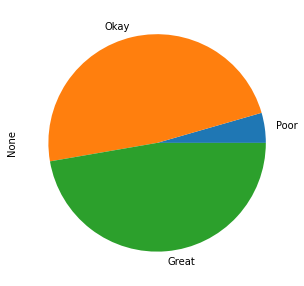

In [69]:
F = fail.groupby('Binned').size()
F.plot.pie(figsize=(5,5))
plt.savefig('images/pie_all_failing_rating.png')